In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import trim_mean, mode, skew, kurtosis

In [29]:
wine_data = pd.read_csv('winequality.csv', sep = ",")

In [30]:
wine_data

,Unnamed: 0,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_y
0,0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,NaN
4,4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1594,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,1595,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,1596,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,1597,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,NaN


In [31]:
wine_data = wine_data.drop(columns=['Unnamed: 0', 'index'])

In [32]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_y
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,NaN
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,NaN


# Dataset overview

In [34]:
print(wine_data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [35]:
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [36]:
mode_quality = wine_data['quality_y'].mode()[0]
mode_quality

5.0

In [37]:
wine_data['quality_y'].fillna(mode_quality, inplace=True)

<ipython-input-37-2dd250b18218>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wine_data['quality_y'].fillna(mode_quality, inplace=True)


In [38]:
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


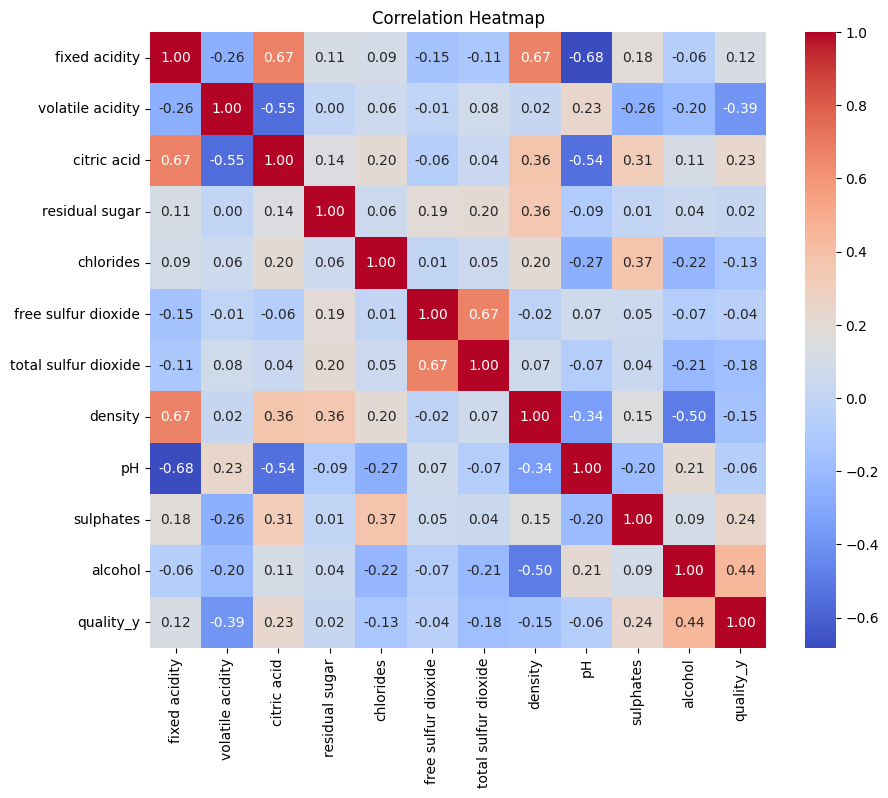

In [39]:
correlation_matrix = wine_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.title('Correlation Heatmap')
plt.show()

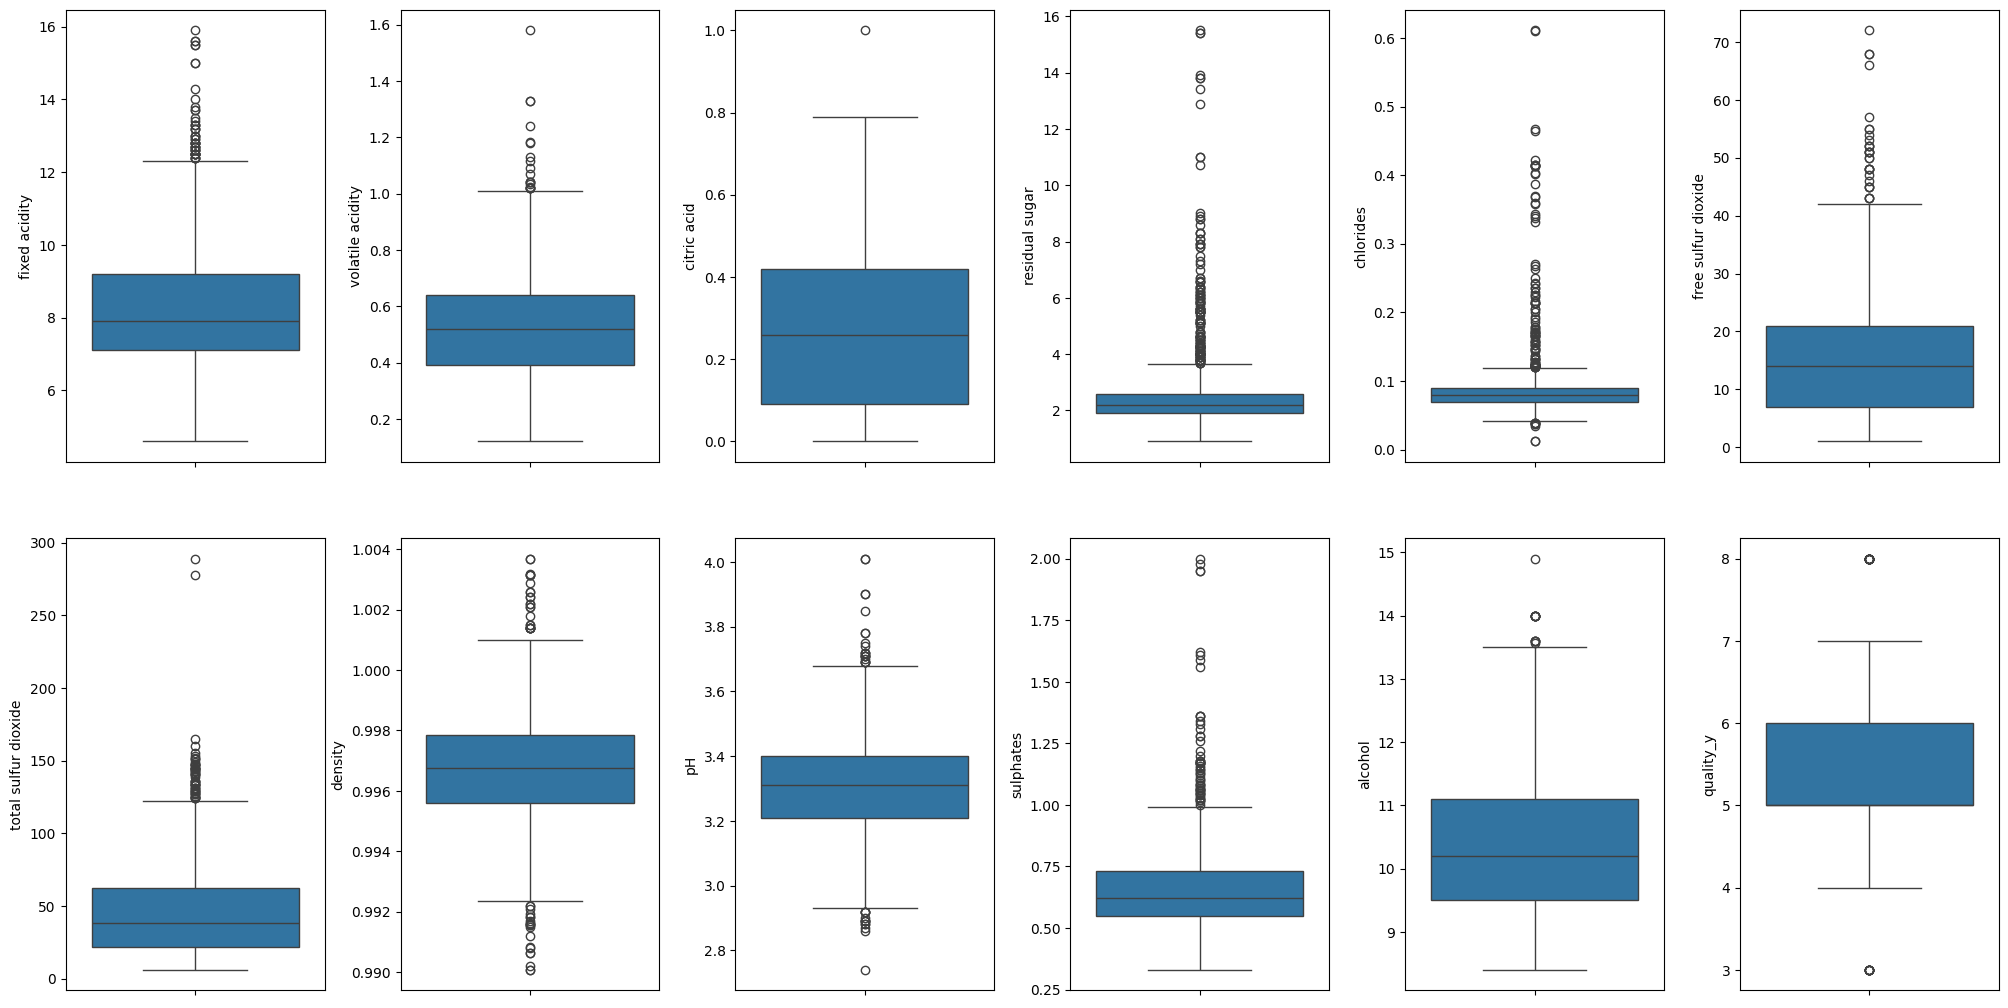

In [40]:
fig, axs = plt.subplots(ncols = 6, nrows = 2, figsize = (20, 10)) #create a grid of plots for features
index = 0
axs = axs.flatten() # flattens the 2D array of axes into a 1D array

for i, j in wine_data.items(): # vizualising each feature through box plot
    sns.boxplot(y = i, data = wine_data, ax = axs[index])
    index += 1

plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

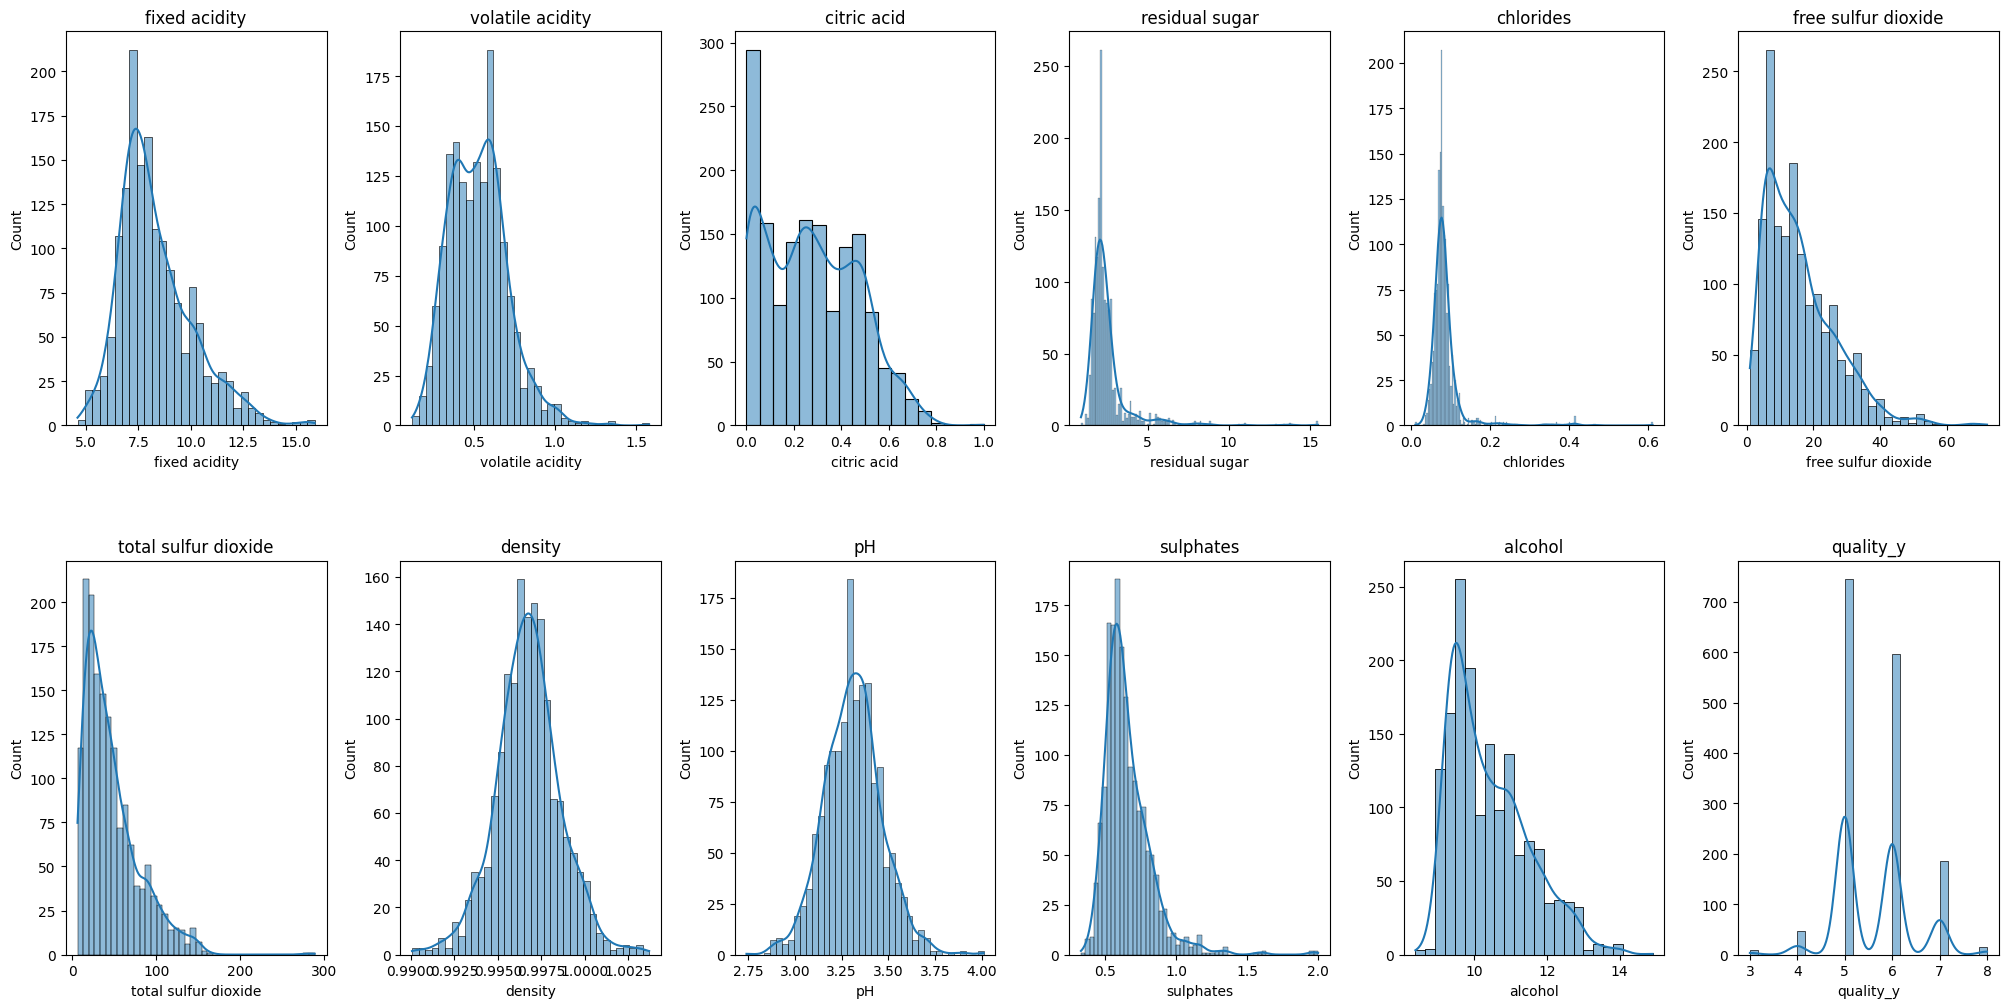

In [41]:
fig, axs = plt.subplots(ncols = 6, nrows = 2, figsize = (20, 10)) # create a grid of plots for features
index = 0
axs = axs.flatten() # flattens the 2D array of axes into a 1D array

for k, v in wine_data.items():
    sns.histplot(wine_data[k], ax = axs[index], kde=True)  # kde=True adds a Kernel Density Estimate
    axs[index].set_title(k)  # Set title for each subplot based on feature name
    index += 1

plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [42]:
print(wine_data.corr(method='spearman')['quality_y'].sort_values(ascending=False))

quality_y               1.000000
alcohol                 0.441389
sulphates               0.357218
citric acid             0.214427
fixed acidity           0.108632
residual sugar          0.028913
pH                     -0.049482
free sulfur dioxide    -0.049671
density                -0.153263
chlorides              -0.178702
total sulfur dioxide   -0.183937
volatile acidity       -0.379497
Name: quality_y, dtype: float64


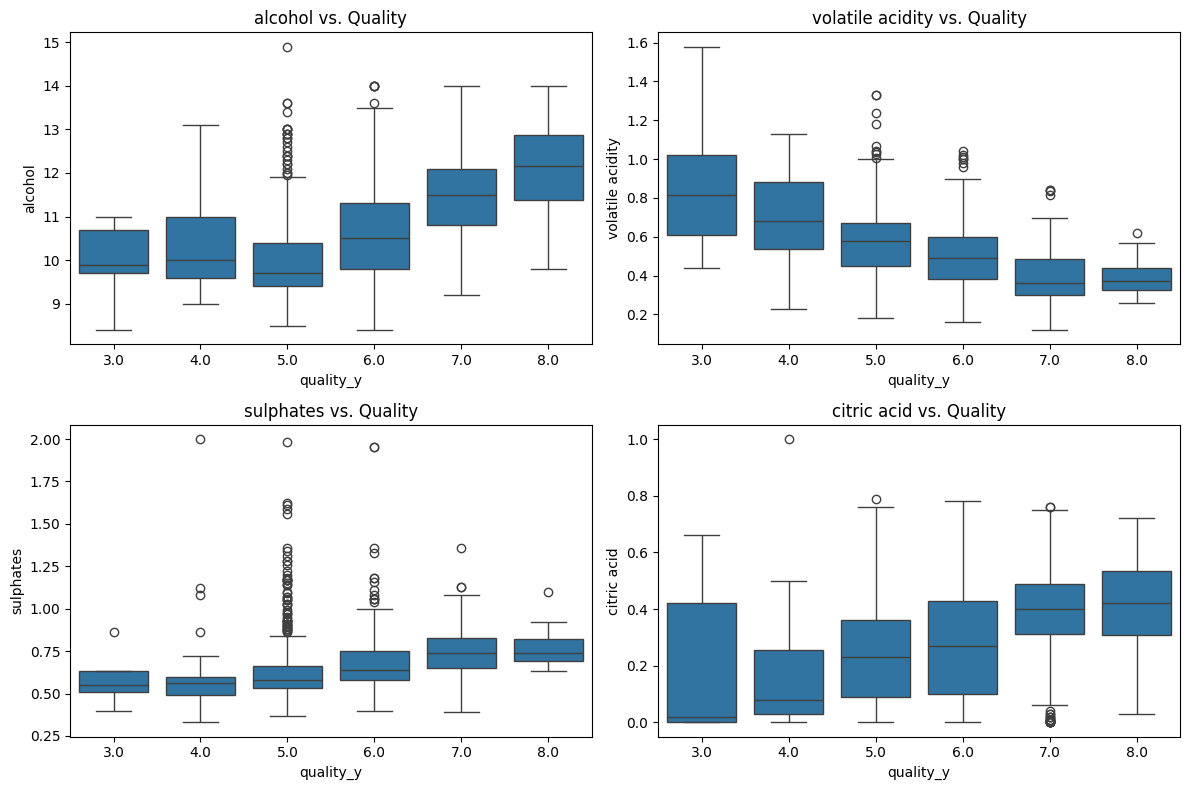

In [43]:
features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=wine_data['quality_y'], y=wine_data[feature])
    plt.title(f'{feature} vs. Quality')

plt.tight_layout()
plt.show()

# Handling outliers

In [44]:
#The typical range of sulphates for red wines is 0.5-0.9. Anything above 1.2 can be considerd as outliers.

Q1 = wine_data['sulphates'].quantile(0.25)
Q3 = wine_data['sulphates'].quantile(0.75)
IQR = Q3 - Q1
wine_data = wine_data[(wine_data['sulphates'] >= Q1 - 1.5*IQR) & (wine_data['sulphates'] <= Q3 + 1.5*IQR)]

In [45]:
#Winsorization (to replace extreme values with the nearest threshold) for chlorides, as above 0.15 is highly unlikely

upper_limit = wine_data['chlorides'].quantile(0.95)
wine_data.loc[:, 'chlorides'] = wine_data['chlorides'].clip(upper=upper_limit)

In [46]:
#free sulfur dioxide - Anything above 50 is highly unlikely, so we cut with the 99% percentile (rare but valid high values remain while extreme outliers are capped)

upper_limit = wine_data['free sulfur dioxide'].quantile(0.99)
wine_data = wine_data[wine_data['free sulfur dioxide'] <= upper_limit]

In [47]:
#total sulfur dioxide - Outliers above 150-200 are extreme

upper_limit = wine_data['total sulfur dioxide'].quantile(0.99)
wine_data = wine_data[wine_data['total sulfur dioxide'] <= upper_limit]

In [48]:
#volatile acidity - moderate outliers. Log transformation to reduce skewness. Higher values are negatively correlated with quality
wine_data['volatile acidity'] = np.log1p(wine_data['volatile acidity'])

In [49]:
#citric acid - Right-skewed with some high outliers. Log transformation to reduce skewness. (to make the high values closer to the smaller ones, making futue model development more stable.)

wine_data['citric acid'] = np.log1p(wine_data['citric acid'])

In [50]:
#pH - log transformation. few outlier, but data is generally well-distributed

wine_data['pH'] = np.log1p(wine_data['pH'])

In [51]:
#density - Most values are tightly packed, and extreme values are rare. log transformation

wine_data['density'] = np.log1p(wine_data['density'])

No outlier handling for


*   alcohol - Higher alcohol correlates with better quality
*   residual sugar - Outliers might indicate different wine styles
*   quality_y - categorical. leave as it is.






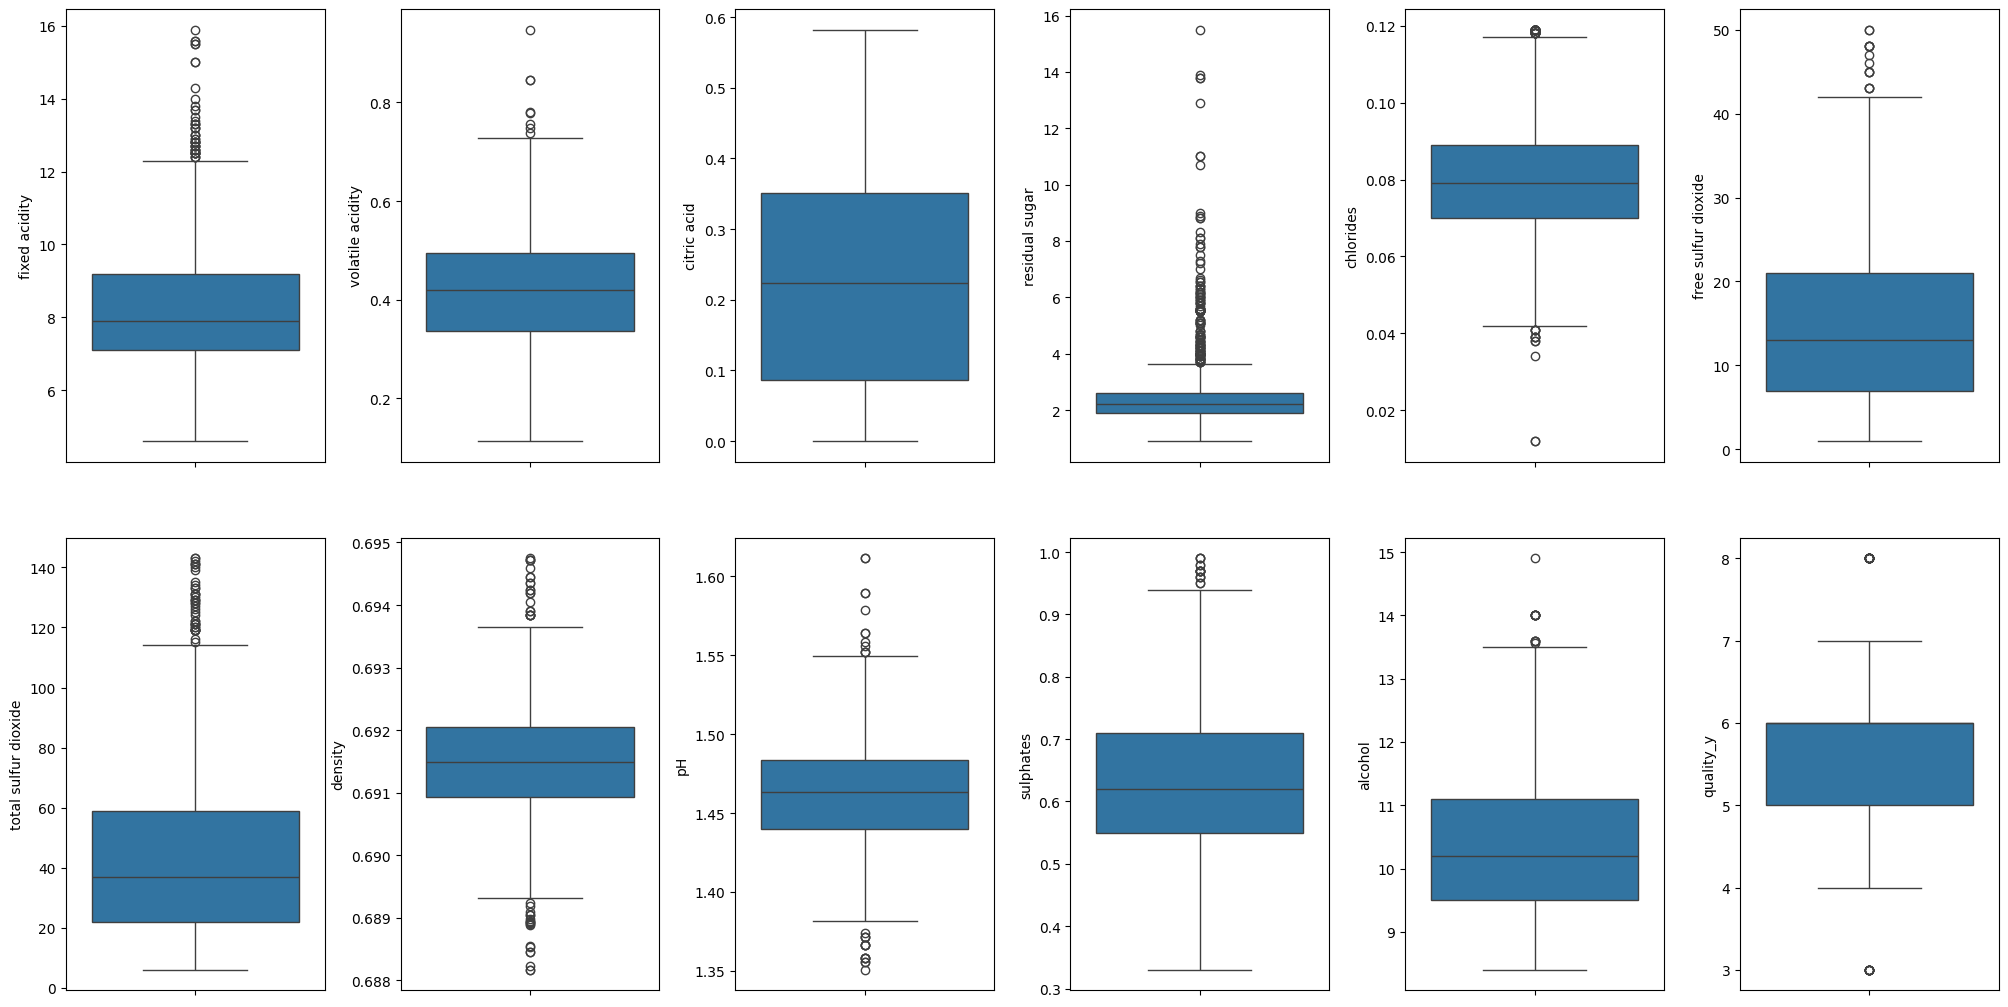

In [52]:
fig, axs = plt.subplots(ncols = 6, nrows = 2, figsize = (20, 10)) #create a grid of plots for features
index = 0
axs = axs.flatten() # flattens the 2D array of axes into a 1D array

for i, j in wine_data.items(): # vizualising each feature through box plot
    sns.boxplot(y = i, data = wine_data, ax = axs[index])
    index += 1

plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

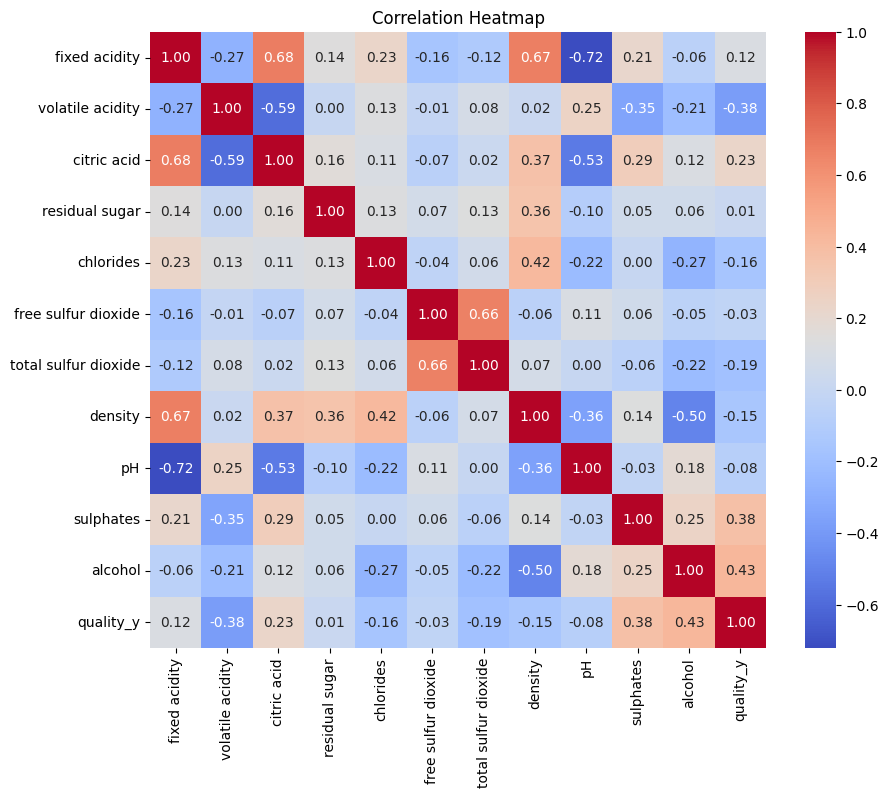

In [53]:
correlation_matrix = wine_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.title('Correlation Heatmap')
plt.show()

#The strong and positive correclation bewteen some features don't need elaboration, as their concept and calculation method
#already imply the correlation. The interesting point is there are few features with significant correlation levels with quality_y - volatile acidity & alcohol.